<a href="https://colab.research.google.com/github/helen030/portfolio/blob/main/Objective_5_Side_effects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                  drug_name  rating  \
2135                              meloxicam     6.8   
2136                               Celebrex     7.1   
2137                                  Mobic     8.1   
2138                               naproxen     6.7   
2139                              ibuprofen     7.5   
...                                     ...     ...   
2768                                Kevzara     5.5   
2769                                Ridaura    10.0   
2770                            tofacitinib     5.2   
2772  camphor / menthol / methyl salicylate     9.0   
2781                              sarilumab     5.5   

                                           side_effects  num_side_effects  
2135  sneezing, runny or stuffy nose; wheezing or tr...                46  
2136  chest pain spreading to your jaw or shoulder, ...                41  
2137  sneezing, runny or stuffy nose; wheezing or tr...                47  
2138  chest pain spreading to your 

/var/folders/d9/xs6934657dd34g1_0xr8tmrr0000gn/T/ipykernel_10465/1301372556.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data.dropna(subset=['rating'], inplace=True)
/var/folders/d9/xs6934657dd34g1_0xr8tmrr0000gn/T/ipykernel_10465/1301372556.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['num_side_effects'] = extracted_data['side_effects'].str.count(';|\,') + 1
/var/folders/d9/xs6934657dd34g1_0xr8tmrr0000gn/T/ipykernel_10465/1301372556.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

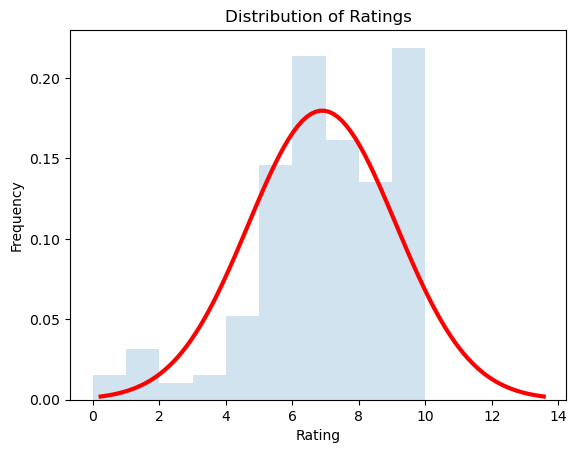

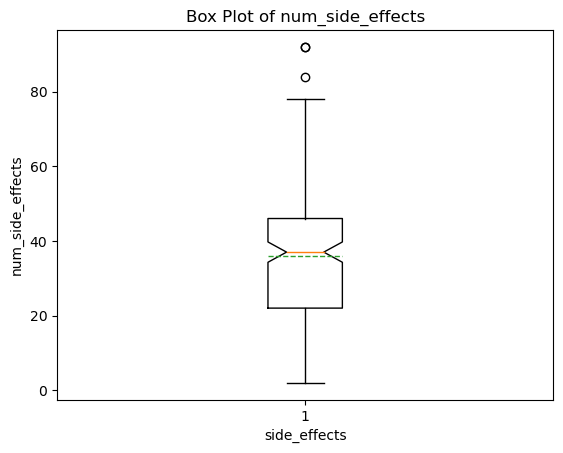

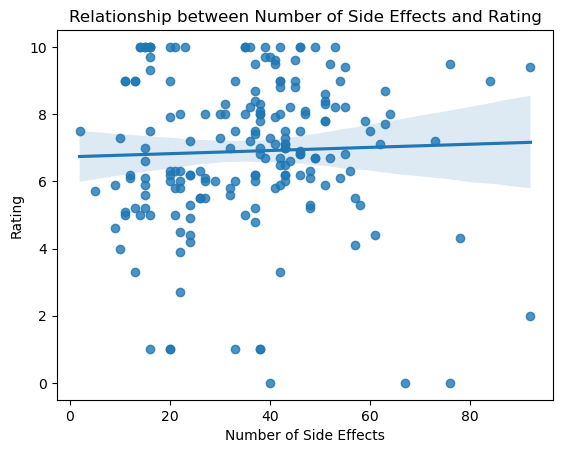

Correlation: 0.03591135181329777


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

data = pd.read_csv('/Users/a123/Downloads/dataset.csv')

# Define the specific categories
desired_categories = ['Osteoarthritis', 'Pain', 'Rheumatoid Arthritis']

# Filter the data for the desired categories
filtered_data = data[data['medical_condition'].isin(desired_categories)]

# Select the columns of interest
selected_columns = ['drug_name', 'rating', 'side_effects']

# Extract the data for the desired categories and selected columns
extracted_data = filtered_data[selected_columns]
extracted_data.dropna(subset=['rating'], inplace=True)

# Calculate the number of side effects in each row
extracted_data['num_side_effects'] = extracted_data['side_effects'].str.count(';|\,') + 1

# Calculate the mean number of side effects
mean_num_side_effects = extracted_data['num_side_effects'].mean()

# Fill missing values with the mean number of side effects
extracted_data['num_side_effects'].fillna(mean_num_side_effects, inplace=True)

# Print the updated extracted_data
print(extracted_data)

# Concatenate all side effects into a single string
all_side_effects = ';'.join(filtered_data['side_effects'].dropna())

# Split the side effects by ';'
side_effects_list = all_side_effects.split(';')

# Get the counts of each side effect
side_effect_counts = Counter(side_effects_list)

# Get the most commonly appearing side effect
most_common_side_effect = side_effect_counts.most_common(1)[0][0]

# Print the most commonly appearing side effect
print("Most commonly appearing side effect:", most_common_side_effect)
#############
# Calculate summary statistics
rating_mean = extracted_data['rating'].mean()
rating_median = extracted_data['rating'].median()
rating_min = extracted_data['rating'].min()
rating_max = extracted_data['rating'].max()

# Print the summary statistics
print("Mean Rating:", rating_mean)
print("Median Rating:", rating_median)
print("Minimum Rating:", rating_min)
print("Maximum Rating:", rating_max)

# Plot a histogram of ratings
plt.hist(extracted_data['rating'], bins=10, density=True, alpha=0.2)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Fit a normal distribution curve to the data
mu, sigma = extracted_data['rating'].mean(), extracted_data['rating'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.plot(x, pdf, 'r-', linewidth=3)

# Show the plot
plt.show()

#############
# Create a box plot
plt.boxplot(extracted_data['num_side_effects'], showmeans=True, meanline=True, notch=True)

# Add labels and title
plt.xlabel('side_effects')
plt.ylabel('num_side_effects')
plt.title('Box Plot of num_side_effects')

# Show the plot
plt.show()

#############
# Plot the relationship graph
sns.regplot(x=extracted_data['num_side_effects'], y=extracted_data['rating'])


# Add labels and title
plt.xlabel('Number of Side Effects')
plt.ylabel('Rating')
plt.title('Relationship between Number of Side Effects and Rating')

# Show the plot
plt.show()

# Calculate the correlation
correlation = extracted_data['num_side_effects'].corr(extracted_data['rating'])
print("Correlation:", correlation)